In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('sales_df.csv')

/var/folders/3k/kd9rcxws7ygft2krzxncw_400000gn/T/ipykernel_5841/762810495.py:1: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('sales_df.csv')


In [3]:
data

,Unnamed: 0,item_id,sale_amount,sale_date,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14
0,0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,3.520026e+10,3.520026e+10
1,1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,3.520026e+10,3.520026e+10
2,2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,3.520026e+10,3.520026e+10
3,3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,3.520026e+10,3.520026e+10
4,4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,3.520026e+10,3.520026e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912995,912995,50,63.0,"Wed, 27 Dec 2017 00:00:00 GMT",912996,10,8503 NW Military Hwy,San Antonio,TX,78231,NaN,NaN,NaN,NaN,NaN
912996,912996,50,59.0,"Thu, 28 Dec 2017 00:00:00 GMT",912997,10,8503 NW Military Hwy,San Antonio,TX,78231,NaN,NaN,NaN,NaN,NaN
912997,912997,50,74.0,"Fri, 29 Dec 2017 00:00:00 GMT",912998,10,8503 NW Military Hwy,San Antonio,TX,78231,NaN,NaN,NaN,NaN,NaN
912998,912998,50,62.0,"Sat, 30 Dec 2017 00:00:00 GMT",912999,10,8503 NW Military Hwy,San Antonio,TX,78231,NaN,NaN,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     913000 non-null  int64  
 1   item_id        913000 non-null  int64  
 2   sale_amount    913000 non-null  float64
 3   sale_date      913000 non-null  object 
 4   sale_id        913000 non-null  int64  
 5   store_id       913000 non-null  int64  
 6   store_address  913000 non-null  object 
 7   store_city     913000 non-null  object 
 8   store_state    913000 non-null  object 
 9   store_zipcode  913000 non-null  int64  
 10  item_brand     365200 non-null  object 
 11  item_name      365200 non-null  object 
 12  item_price     365200 non-null  float64
 13  item_upc12     365200 non-null  float64
 14  item_upc14     365200 non-null  float64
dtypes: float64(4), int64(5), object(6)
memory usage: 104.5+ MB


In [5]:
data=data.drop(columns=['Unnamed: 0'])


In [6]:
data.sale_date = data.sale_date.str.replace(' 00:00:00 GMT', '')
data.sale_date

0         Tue, 01 Jan 2013
1         Wed, 02 Jan 2013
2         Thu, 03 Jan 2013
3         Fri, 04 Jan 2013
4         Sat, 05 Jan 2013
                ...       
912995    Wed, 27 Dec 2017
912996    Thu, 28 Dec 2017
912997    Fri, 29 Dec 2017
912998    Sat, 30 Dec 2017
912999    Sun, 31 Dec 2017
Name: sale_date, Length: 913000, dtype: object

In [7]:
data.sale_date = pd.to_datetime(data.sale_date, format='%a, %d %b %Y')
data.sale_date

0        2013-01-01
1        2013-01-02
2        2013-01-03
3        2013-01-04
4        2013-01-05
            ...    
912995   2017-12-27
912996   2017-12-28
912997   2017-12-29
912998   2017-12-30
912999   2017-12-31
Name: sale_date, Length: 913000, dtype: datetime64[ns]

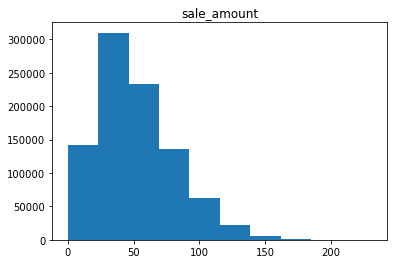

In [8]:
plt.hist(data.sale_amount)
plt.title('sale_amount')
plt.show()

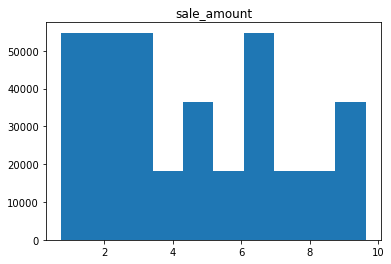

In [9]:
plt.hist(data.item_price)
plt.title('sale_amount')
plt.show()

In [10]:
data=data.set_index('sale_date')

In [11]:
data['month']=data.index.strftime('%B')

In [12]:
data['day of week'] = data.index.day_name()

In [13]:
data['sales_total']=data['sale_amount']*data['item_price']

In [14]:
data

,item_id,sale_amount,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14,month,day of week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,3.520026e+10,3.520026e+10,January,Tuesday,10.92
2013-01-02,1,11.0,2,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,3.520026e+10,3.520026e+10,January,Wednesday,9.24
2013-01-03,1,14.0,3,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,3.520026e+10,3.520026e+10,January,Thursday,11.76
2013-01-04,1,13.0,4,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,3.520026e+10,3.520026e+10,January,Friday,10.92
2013-01-05,1,10.0,5,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,3.520026e+10,3.520026e+10,January,Saturday,8.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-27,50,63.0,912996,10,8503 NW Military Hwy,San Antonio,TX,78231,NaN,NaN,NaN,NaN,NaN,December,Wednesday,NaN
2017-12-28,50,59.0,912997,10,8503 NW Military Hwy,San Antonio,TX,78231,NaN,NaN,NaN,NaN,NaN,December,Thursday,NaN
2017-12-29,50,74.0,912998,10,8503 NW Military Hwy,San Antonio,TX,78231,NaN,NaN,NaN,NaN,NaN,December,Friday,NaN


In [15]:
def prepare():
    data=pd.read_csv('sales_df.csv')
    data=data.drop(columns=['Unnamed: 0'])
    data.sale_date = data.sale_date.str.replace(' 00:00:00 GMT', '')
    data.sale_date = pd.to_datetime(data.sale_date, format='%a, %d %b %Y')
    plt.hist(data.sale_amount)
    plt.title('sale_amount')
    plt.show()
    data=data.set_index('sale_date')
    data['month']=data.index.strftime('%B')
    data['day of week'] = data.index.day_name()
    data['sales_total']=data['sale_amount']*data['item_price']
    return data

/var/folders/3k/kd9rcxws7ygft2krzxncw_400000gn/T/ipykernel_5841/2531025259.py:2: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('sales_df.csv')


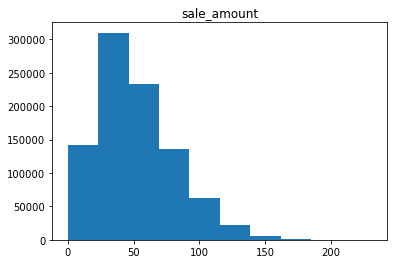

In [16]:
data1=prepare()

In [17]:
import acquire
data1=acquire.data()

In [18]:
data1

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.18400,NaN,NaN,NaN
1,2006-01-02,1380.52100,NaN,NaN,NaN
2,2006-01-03,1442.53300,NaN,NaN,NaN
3,2006-01-04,1457.21700,NaN,NaN,NaN
4,2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714


In [36]:
data1.Date=data1.Date.astype('datetime64')
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         4383 non-null   datetime64[ns]
 1   Consumption  4383 non-null   float64       
 2   Wind         2920 non-null   float64       
 3   Solar        2188 non-null   float64       
 4   Wind+Solar   2187 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 171.3 KB


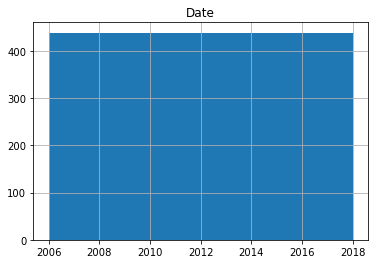

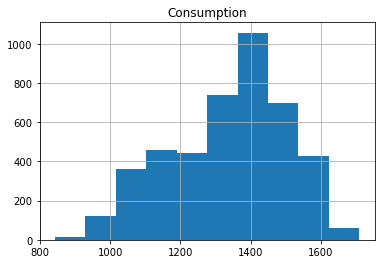

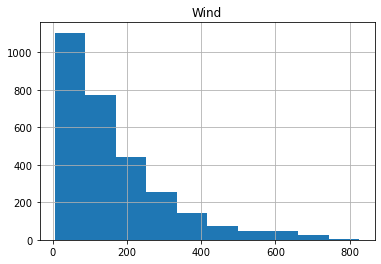

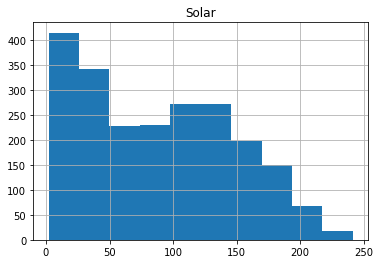

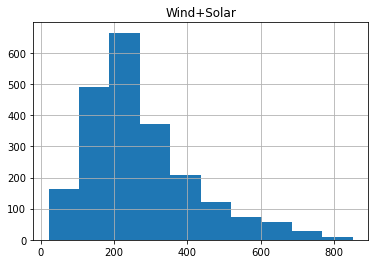

In [32]:
for col in data1.columns:
    data1[col].hist()
    plt.title(col)
    plt.show()

In [38]:
data1=data1.set_index('Date')

In [39]:
data1['month']=data1.index.strftime('M')
data1['year']=data1.index.year

In [41]:
data1.isnull().sum()

Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
month             0
year              0
dtype: int64

<AxesSubplot:xlabel='Date'>

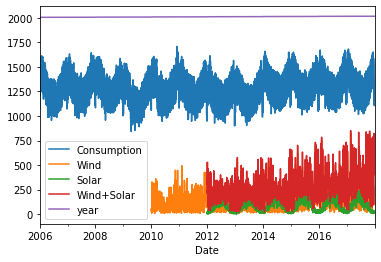

In [42]:
data1.plot()

In [44]:
data1=data1.fillna(0)

In [50]:
def data1():
    data = acquire.data()
    data.Date = data.Date.astype('datetime64')
    data = data.set_index('Date')
    data['month'] = data.index.month
    data['year'] = data.index.year
    data = data.fillna(0)
    return data

In [51]:
data1()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.18400,0.000,0.000,0.000,1,2006
2006-01-02,1380.52100,0.000,0.000,0.000,1,2006
2006-01-03,1442.53300,0.000,0.000,0.000,1,2006
2006-01-04,1457.21700,0.000,0.000,0.000,1,2006
2006-01-05,1477.13100,0.000,0.000,0.000,1,2006
...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,12,2017
2017-12-28,1299.86398,506.424,14.162,520.586,12,2017
2017-12-29,1295.08753,584.277,29.854,614.131,12,2017
